# **Etape 1 : Définition du problème**

## **Quel est le problème que je cherche à resoudre ?**
C'est la Prévision du loyer ou du prix d'une maisson en tenant de compte de certains facteurs ou caractéristiques comme : nombre de chambres, hall et cuisine, taille de la propriété, le sol de la maison, type de zone, etc.

# **Quel est l'objectif du modèle ?**
C'est de **prédire le prix** d'une ou plusieurs maisons en utilisant le **machine learning**. Pour ce projet de test, je vais utiliser le **modèle de regression linéaire** vue qu'il s'agit de prédire une **valeur numérique**. Mais je pourrai utilisé d'autres **modèles plus puissants** que la regression linéaire pour continuer mon apprentissage.

# **Etape 2 : Acquisition et Exploration des données (Data understanding & EDA)**

## **Collecter les données**
Je vais utiliser le jeu d'ensemble de données disponible sur la plateforme Kaggle accessible via https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset

## **Ci-dessous les variables disponibles du dataset**
Explication en français des variables de notre dataset 'House_Rent_Dataset.csv' et leur explication en anglais dans le fichier txt 'Dataset Glossary.txt'

**BHK**: Nombre de chambres, hall d'entrée, cuisine.

**Rent**: Loyer des maisons/appartements/flats.

**Size**: Taille des maisons/appartements en pieds carrés.

**Floor**: Maisons/appartements situés à quel étage et nombre total d'étages (exemple : rez-de-chaussée sur 2, 3 sur 5, etc.)

**Area Type**: Taille des maisons/appartements calculée sur la base de la Superficie, de la Surface de Moquette ou de la Surface de Construction.

**Area Locality**: Localité des maisons/appartements.

**City**: Ville où se trouvent les maisons/appartements.

**Furnishing Status**: L'état d'équipement des maisons/appartements, qu'ils soient meublés, semi-meublés ou non meublés.

**Tenant Preferred**: Type de locataire préféré par le propriétaire ou l'agent.

**Bathroom**: Nombre de salles de bains.

**Point of Contact**: Qui contacter pour plus d'informations sur les maisons/appartements.

In [547]:
# Importation des bibliothèques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from sklearn.preprocessing import StandardScaler,LabelEncoder # Transformation du jeu de données
from sklearn.model_selection import train_test_split # Division du jeu de données
from sklearn.linear_model import LinearRegression # Modèle LM à utiliser
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score # Évaluer les performances du modèle

## **Analyse exploratoire des données (EDA)**

In [548]:
# Chargement du dataset
df = pd.read_csv("House_Rent_Dataset.csv")
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [549]:
# Taille du dataset : Nombre de lignes et colonnes
df.shape

(4746, 12)

In [550]:
# Infos sur le dataset : le nombre de lignes, colonnes, la liste des colonnes et leurs types, 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [551]:
# Statistiques descriptives sur le dataset
df.describe(include = "all")

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
count,4746,4746.000000,4.746000e+03,4746.000000,4746,4746,4746,4746,4746,4746,4746.000000,4746
unique,81,NaN,NaN,NaN,480,3,2235,6,3,3,NaN,3
top,2022-07-06,NaN,NaN,NaN,1 out of 2,Super Area,Bandra West,Mumbai,Semi-Furnished,Bachelors/Family,NaN,Contact Owner
freq,311,NaN,NaN,NaN,379,2446,37,972,2251,3444,NaN,3216
mean,NaN,2.083860,3.499345e+04,967.490729,NaN,NaN,NaN,NaN,NaN,NaN,1.965866,NaN
std,NaN,0.832256,7.810641e+04,634.202328,NaN,NaN,NaN,NaN,NaN,NaN,0.884532,NaN
min,NaN,1.000000,1.200000e+03,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
25%,NaN,2.000000,1.000000e+04,550.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
50%,NaN,2.000000,1.600000e+04,850.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN
75%,NaN,3.000000,3.300000e+04,1200.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN


In [552]:
# Statistiaues descriptive sur la variable cible
def target_describe(target):
    describe = df[target].describe()
    describe_df = describe.reset_index() # Réinitialise l'index du DataFrame
    describe_df.columns = ["Libellé", "Cible"]
    return describe_df

stat_target = target_describe("Rent")
stat_target

,Libellé,Cible
0,count,4.746000e+03
1,mean,3.499345e+04
2,std,7.810641e+04
3,min,1.200000e+03
4,25%,1.000000e+04
5,50%,1.600000e+04
6,75%,3.300000e+04
7,max,3.500000e+06


In [553]:
print(f"Nombre total des loyers : {stat_target['Cible'][0]:.2f}")
print(f"Loyer moyen : {stat_target['Cible'][1]:.2f}")
print(f"L'écart type, indiquant la dispersion des données : {stat_target['Cible'][2]:.2f}")

print()
print(f"25% des loyers sont <= : {stat_target['Cible'][4]:.2f}")
print(f"50% des loyers sont (Ou la méddiane des loyers) <= : {stat_target['Cible'][5]:.5f}")
print(f"75% des loyers sont <= : {stat_target['Cible'][6]:.2f}")
print()
print(f"Loyer le plus bas : {stat_target['Cible'][3]:.2f}")
print(f"Loyer le plus élevé : {stat_target['Cible'][7]:.2f}")

Nombre total des loyers : 4746.00
Loyer moyen : 34993.45
L'écart type, indiquant la dispersion des données : 78106.41

25% des loyers sont <= : 10000.00
50% des loyers sont (Ou la méddiane des loyers) <= : 16000.00000
75% des loyers sont <= : 33000.00

Loyer le plus bas : 1200.00
Loyer le plus élevé : 3500000.00


In [554]:
# Vérification des valeurs manquantes
def display_missing_values(dataset):
    missing_values_ratio = df.isnull().mean()*100 # Calcul le ratio
    missing_values_df = missing_values_ratio.reset_index() # Définir l'index pour un DataFrame
    missing_values_df.columns = ["Colonnes", "Proportions (%)"] # j'ajoute des colonnes au DataFrame
    missing_values_df = missing_values_df.sort_values(by = "Proportions (%)", ascending=False).reset_index(drop=True) # Pour trier les valeurs et réinitialiser l'index du dataFrame
    return missing_values_df

missing_values = display_missing_values(df)
missing_values # Aucune valeur manquante

,Colonnes,Proportions (%)
0,Posted On,0.0
1,BHK,0.0
2,Rent,0.0
3,Size,0.0
4,Floor,0.0
5,Area Type,0.0
6,Area Locality,0.0
7,City,0.0
8,Furnishing Status,0.0
9,Tenant Preferred,0.0


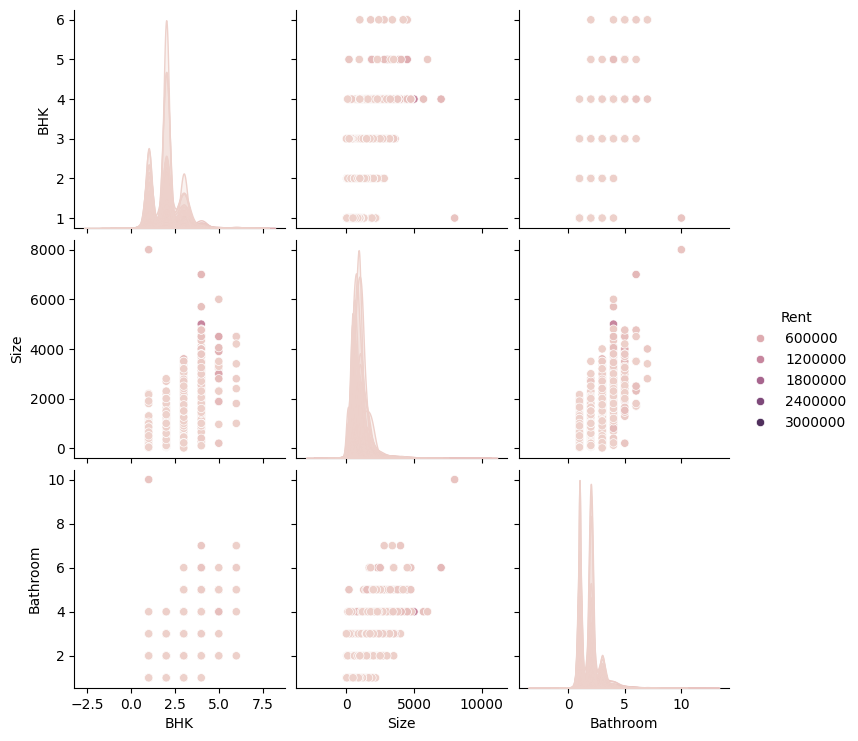

In [555]:
# Visualisation de la relation des variables quantitatives et la variable cible
sns.pairplot(data = df, hue = "Rent")
plt.show()

On remarque que le pairplot suggère que le nombre d'appartement **"BHK"**, la surface en mettre carré **"Size"** et le nombre de salle de bains **"Bathroom"** sont des indicateurs importants du prix du loyer. On remarque une **corrélation positive** entre les différentes propriétés. Les appartements plus grands, avec plus de chambres et de salles de bain, commandent généralement des **loyers plus élevés**.

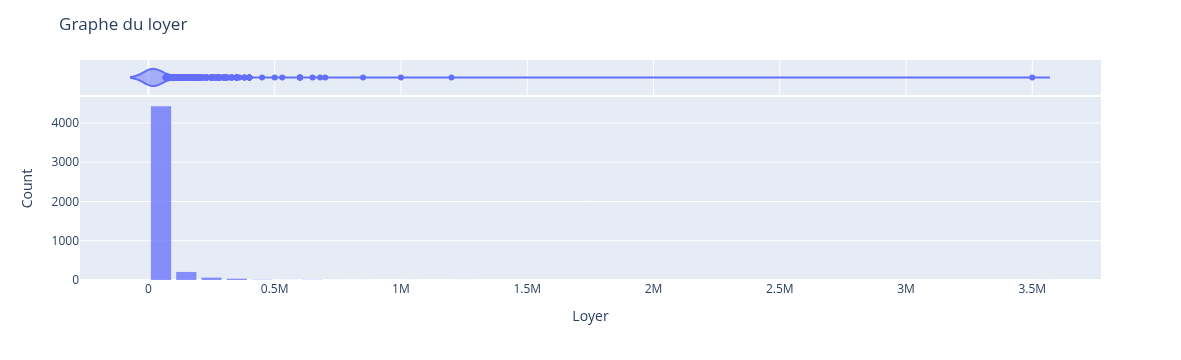

In [556]:
# Création de l'histogramme pour la distribution du loyer
fig = px.histogram(df, x = "Rent", nbins = 50, marginal = "violin", opacity =0.75)
fig.update_layout(
    title="Graphe du loyer",
    xaxis_title='Loyer',
    yaxis_title='Count',
    bargap=0.2
)
fig.show()

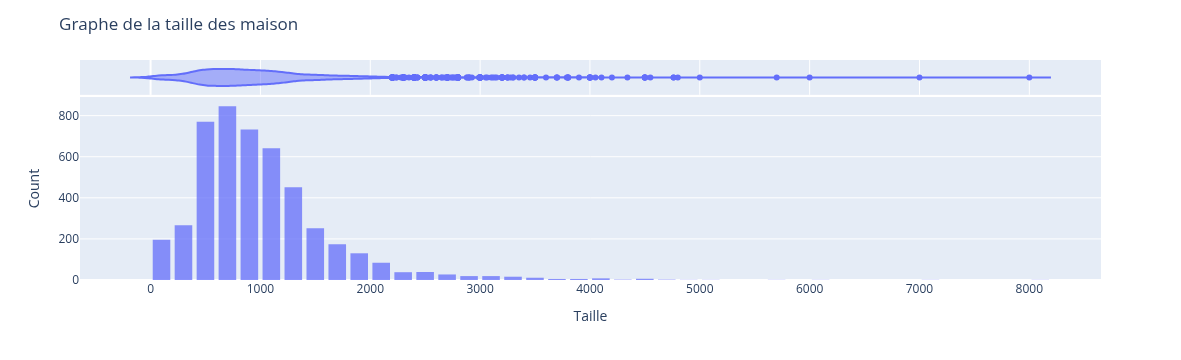

In [557]:
# Création de l'histogramme pour la distribution de la taille
fig = px.histogram(df, x = "Size", nbins = 50, marginal = "violin", opacity =0.75)
fig.update_layout(
    title="Graphe de la taille des maison",
    xaxis_title='Taille',
    yaxis_title='Count',
    bargap=0.2
)
fig.show()

### On remarque que les valeurs des loyers et celle de la taille comprennent des **valeurs aberrantes**.

In [558]:
# Exemple de calcul pour traiter les valeurs aberrantes
Q1 = df['Rent'].quantile(0.25)
Q3 = df['Rent'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Données en dessous du 1er quartile (Q1) : ", Q1)
print("Données en dessous du 3e quartile (Q1) : ", Q3)
print("Interquqartile Range ou la zone normale des données : ", IQR)
print("Valeurs aberrantes en dessous de lower_bound : ", lower_bound)
print("Valeurs aberrantes au dessus de upper_bound : ", lower_bound)

Données en dessous du 1er quartile (Q1) :  10000.0
Données en dessous du 3e quartile (Q1) :  33000.0
Interquqartile Range ou la zone normale des données :  23000.0
Valeurs aberrantes en dessous de lower_bound :  -24500.0
Valeurs aberrantes au dessus de upper_bound :  -24500.0


In [559]:
# --- Gestion des valeurs aberrantes ---

print("Gestion des valeurs aberrantes...")

for col in ['Rent', 'Size']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
print(f"Taille du DataFrame après suppression des valeurs aberrantes: {df.shape}")


Gestion des valeurs aberrantes...
Taille du DataFrame après suppression des valeurs aberrantes: (4103, 12)


In [560]:
# Liste des variables qualitatives
qualitatives = df.select_dtypes(exclude="int64")
qualitatives.info() # On a 7 variable qualitatives

<class 'pandas.core.frame.DataFrame'>
Index: 4103 entries, 0 to 4745
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4103 non-null   object
 1   Floor              4103 non-null   object
 2   Area Type          4103 non-null   object
 3   Area Locality      4103 non-null   object
 4   City               4103 non-null   object
 5   Furnishing Status  4103 non-null   object
 6   Tenant Preferred   4103 non-null   object
 7   Point of Contact   4103 non-null   object
dtypes: object(8)
memory usage: 288.5+ KB


In [561]:
qualitatives.head(10)

,Posted On,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Point of Contact
0,2022-05-18,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,Contact Owner
1,2022-05-13,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,Contact Owner
2,2022-05-16,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,Contact Owner
3,2022-07-04,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,Contact Owner
4,2022-05-09,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,Contact Owner
5,2022-04-29,Ground out of 1,Super Area,Thakurpukur,Kolkata,Unfurnished,Bachelors/Family,Contact Owner
6,2022-06-21,Ground out of 4,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,Contact Agent
7,2022-06-21,1 out of 2,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,Contact Agent
8,2022-06-07,1 out of 2,Carpet Area,"Palm Avenue Kolkata, Ballygunge",Kolkata,Unfurnished,Bachelors,Contact Agent
9,2022-06-20,1 out of 3,Carpet Area,Natunhat,Kolkata,Semi-Furnished,Bachelors/Family,Contact Owner


In [562]:
    #qualitatives["Area Type"].value_counts()
    #qualitatives["City"].value_counts()
    #qualitatives["Furnishing Status"].value_counts()
    #qualitatives["Tenant Preferred"].value_counts()
    #qualitatives["Point of Contact"].value_counts()

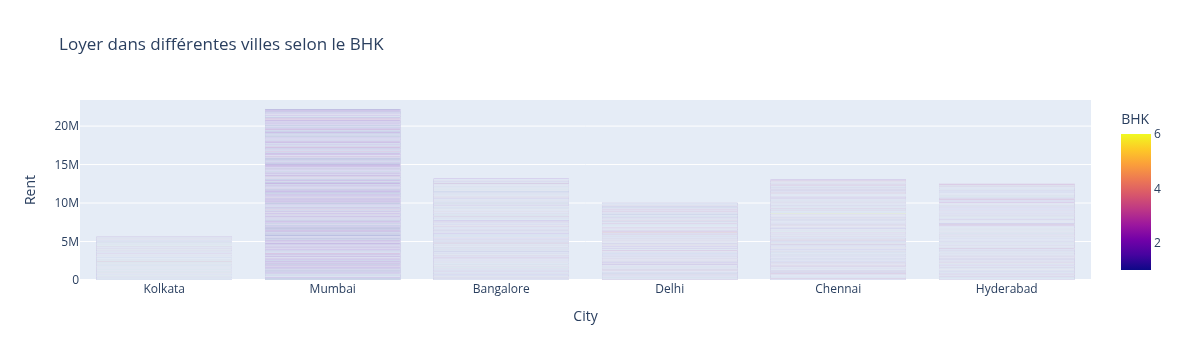

In [563]:
# Loyer des maisons dans différentes villes en fonction du nombre de chambres, de halls et de cuisines
figure = px.bar(df, x = df["City"], y = df["Rent"], color=df["BHK"], title="Loyer dans différentes villes selon le BHK")
figure.show()

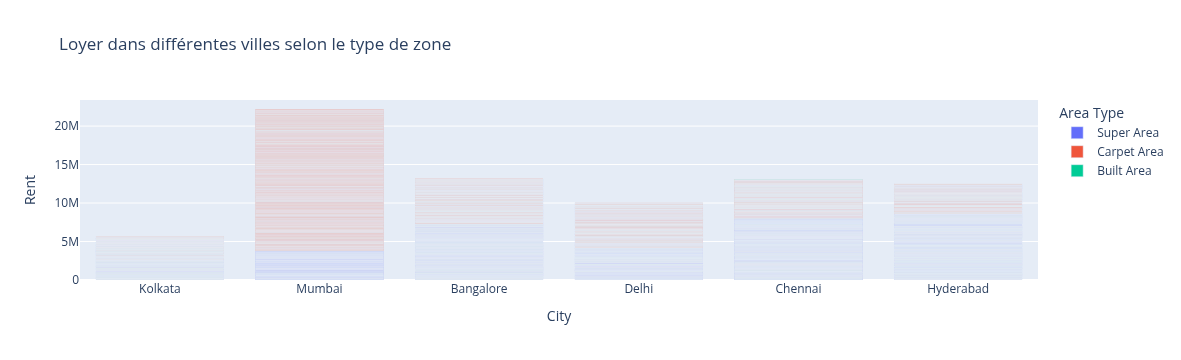

In [564]:
# Loyer des maisons dans différentes villes en fonction du type de zone
figure = px.bar(df, x = df["City"], y = df["Rent"], color=df["Area Type"], title="Loyer dans différentes villes selon le type de zone")
figure.show()

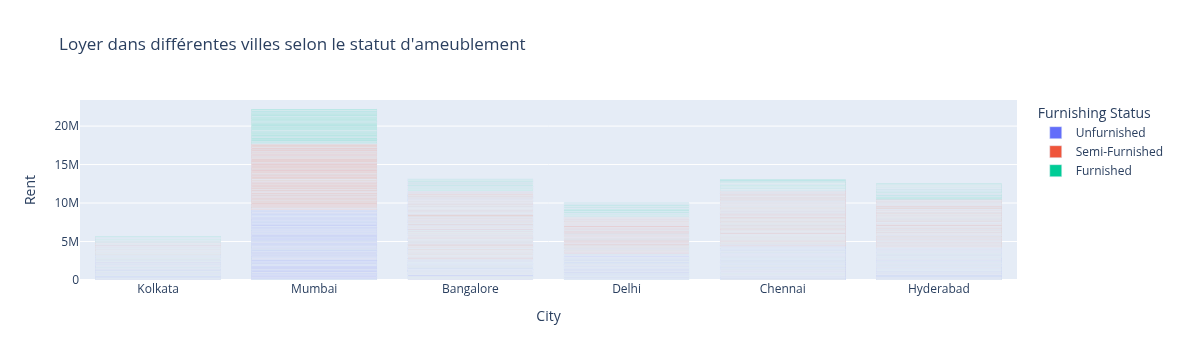

In [565]:
# Loyer des maisons dans différentes villes en fonction du statut d'ameublement
figure = px.bar(df, x = df["City"], y = df["Rent"], color=df["Furnishing Status"], title="Loyer dans différentes villes selon le statut d'ameublement")
figure.show()

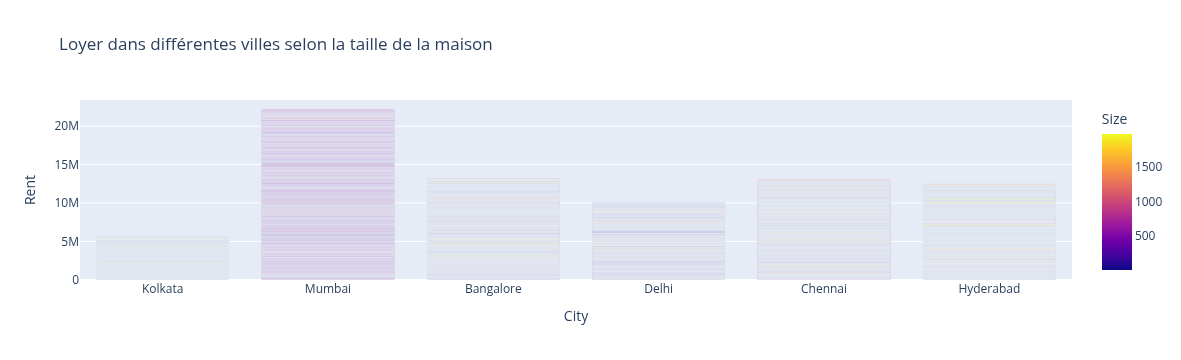

In [566]:
# Loyer des maisons dans différentes villes en fonction de la taille de la maison
figure = px.bar(df, x = df["City"], y = df["Rent"], color=df["Size"], title="Loyer dans différentes villes selon la taille de la maison")
figure.show()

In [567]:
# Le nombre de maison disponible selon la ville
villes = df["City"].value_counts()
villes.reset_index()

,City,count
0,Bangalore,829
1,Chennai,825
2,Hyderabad,793
3,Mumbai,605
4,Delhi,536
5,Kolkata,515


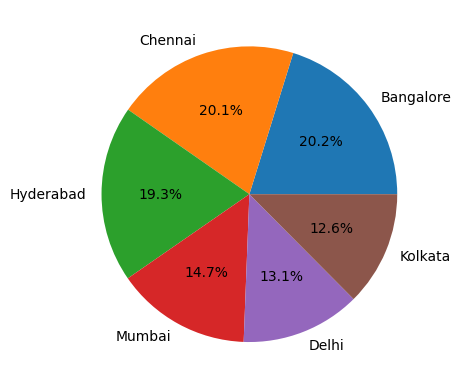

In [568]:
# la vivualisation
cities = df["City"].value_counts()
label = cities.index
counts = cities.values

fig, ax = plt.subplots()
ax.pie(counts, labels=label, autopct='%1.1f%%')
plt.show()

In [569]:
# Le nombre de maison disponible selon les différents types de locataires
types = df["Tenant Preferred"].value_counts()
types.reset_index()

,Tenant Preferred,count
0,Bachelors/Family,3037
1,Bachelors,702
2,Family,364


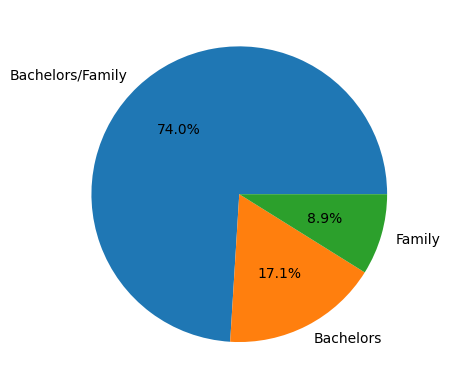

In [570]:
# visualisation des données
fig, ax = plt.subplots()
size = types.values
libelles = types.index
ax.pie(size, labels=libelles, autopct="%1.1f%%")
plt.show()

In [571]:
# Le nombre de maison disponible selon sa taille en surface mettre carré (Type de surface)
surface = df["Area Type"].value_counts()
surface.reset_index()

,Area Type,count
0,Super Area,2317
1,Carpet Area,1784
2,Built Area,2


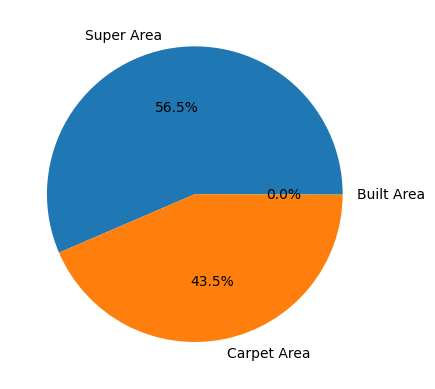

In [572]:
# Visualisation
libelles = surface.index
size = surface.values

fg, ax = plt.subplots()
ax.pie(size, labels = libelles, autopct="%1.1f%%")
plt.show()

In [573]:
# Le nombre de maison disponible selon son statut d'ameublement
statut = df["Furnishing Status"].value_counts()
statut.reset_index()

,Furnishing Status,count
0,Semi-Furnished,1907
1,Unfurnished,1696
2,Furnished,500


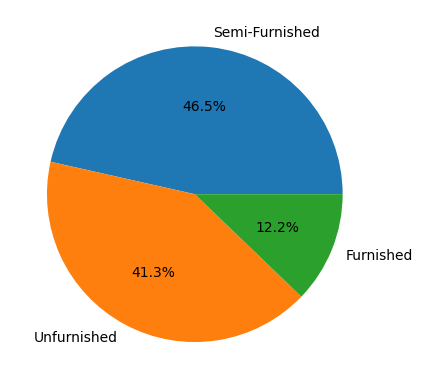

In [574]:
# Visualisation
libelles = statut.index
size = statut.values

fg, ax = plt.subplots()
ax.pie(size, labels = libelles, autopct="%1.1f%%")
plt.show()

# **Etape 3 : Ingénierie des Variables (Feature Engineering)**

## Transformation de variables
Normalisation ou standardisation des variables numériques, encodage des variables catégorielles (One-Hot Encoding, Label Encoding).

In [575]:
# One-Hot Encoding des variables catégorielles : City, Tenant Preferred, Area Type, Furnishing Statut
df_copy = df.copy() # je fais une copie du dataset

tenant = df["Tenant Preferred"].value_counts()
area = df["Area Type"].value_counts()
st = df["Furnishing Status"].value_counts()

In [576]:
df["Tenant Preferred"] = df["Tenant Preferred"].replace({
    "Bachelors/Family":2,
    "Bachelors":1,
    "Family":3,
})

df["Area Type"] = df["Area Type"].replace({
    "Super Area":1,
    "Carpet Area":2,
    "Built Area":3,
})

df["Furnishing Status"] = df["Furnishing Status"].replace({
    "Semi-Furnished":1,
    "Unfurnished":0,
    "Furnished":2,
})

df

/tmp/ipykernel_21083/3283311183.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/tmp/ipykernel_21083/3283311183.py:7: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/tmp/ipykernel_21083/3283311183.py:13: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,1,Bandel,Kolkata,0,2,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,1,"Phool Bagan, Kankurgachi",Kolkata,1,2,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,1,Salt Lake City Sector 2,Kolkata,1,2,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,1,Dumdum Park,Kolkata,0,2,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,2,South Dum Dum,Kolkata,0,1,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4740,2022-06-02,2,12000,1350,2 out of 2,1,Old Alwal,Hyderabad,0,2,2,Contact Owner
4741,2022-05-18,2,15000,1000,3 out of 5,2,Bandam Kommu,Hyderabad,1,2,2,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,2,"Himayath Nagar, NH 7",Hyderabad,1,2,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,2,Gachibowli,Hyderabad,1,3,2,Contact Agent


In [577]:
cit = df["City"].value_counts()
le = LabelEncoder()
df["City_encoded"] = le.fit_transform(df["City"])
df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,City_encoded
0,2022-05-18,2,10000,1100,Ground out of 2,1,Bandel,Kolkata,0,2,2,Contact Owner,4
1,2022-05-13,2,20000,800,1 out of 3,1,"Phool Bagan, Kankurgachi",Kolkata,1,2,1,Contact Owner,4
2,2022-05-16,2,17000,1000,1 out of 3,1,Salt Lake City Sector 2,Kolkata,1,2,1,Contact Owner,4
3,2022-07-04,2,10000,800,1 out of 2,1,Dumdum Park,Kolkata,0,2,1,Contact Owner,4
4,2022-05-09,2,7500,850,1 out of 2,2,South Dum Dum,Kolkata,0,1,1,Contact Owner,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4740,2022-06-02,2,12000,1350,2 out of 2,1,Old Alwal,Hyderabad,0,2,2,Contact Owner,3
4741,2022-05-18,2,15000,1000,3 out of 5,2,Bandam Kommu,Hyderabad,1,2,2,Contact Owner,3
4743,2022-07-10,3,35000,1750,3 out of 5,2,"Himayath Nagar, NH 7",Hyderabad,1,2,3,Contact Agent,3
4744,2022-07-06,3,45000,1500,23 out of 34,2,Gachibowli,Hyderabad,1,3,2,Contact Agent,3


In [578]:
print("Traitement de la colonne 'Floor'...")
def extract_floor_info(floor_str):
    parts = floor_str.split(' out of ')
    floor_level = parts[0]
    total_floors = parts[1] if len(parts) > 1 else None
    
    if floor_level == 'Ground':
        floor_level = 0
    elif floor_level == 'Upper Basement':
        floor_level = -1
    elif floor_level == 'Lower Basement':
        floor_level = -2
    else:
        # Gérer les cas où floor_level n'est pas un nombre valide
        try:
            floor_level = int(floor_level)
        except ValueError:
            floor_level = None # ou une autre valeur par défaut, comme 0 ou la médiane

    if total_floors:
        try:
            total_floors = int(total_floors)
        except ValueError:
            total_floors = None # ou une autre valeur par défaut

    return floor_level, total_floors

df[['Floor_Level', 'Total_Floors']] = df['Floor'].apply(lambda x: pd.Series(extract_floor_info(x)))

Traitement de la colonne 'Floor'...


In [579]:
# Remplacer les NaN potentiels dans Total_Floors (par exemple, par la médiane)
median_total_floors = df['Total_Floors'].median()
df['Total_Floors'].fillna(median_total_floors, inplace=True)
df['Floor_Level'].fillna(0, inplace=True) # Remplacer les NaN potentiels dans Floor_Level

df.drop('Floor', axis=1, inplace=True)
print("Colonne 'Floor' traitée.")

Colonne 'Floor' traitée.


/tmp/ipykernel_21083/2539079554.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/tmp/ipykernel_21083/2539079554.py:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' 

In [580]:
df.head(10)

,Posted On,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,City_encoded,Floor_Level,Total_Floors
0,2022-05-18,2,10000,1100,1,Bandel,Kolkata,0,2,2,Contact Owner,4,0.0,2.0
1,2022-05-13,2,20000,800,1,"Phool Bagan, Kankurgachi",Kolkata,1,2,1,Contact Owner,4,1.0,3.0
2,2022-05-16,2,17000,1000,1,Salt Lake City Sector 2,Kolkata,1,2,1,Contact Owner,4,1.0,3.0
3,2022-07-04,2,10000,800,1,Dumdum Park,Kolkata,0,2,1,Contact Owner,4,1.0,2.0
4,2022-05-09,2,7500,850,2,South Dum Dum,Kolkata,0,1,1,Contact Owner,4,1.0,2.0
5,2022-04-29,2,7000,600,1,Thakurpukur,Kolkata,0,2,2,Contact Owner,4,0.0,1.0
6,2022-06-21,2,10000,700,1,Malancha,Kolkata,0,1,2,Contact Agent,4,0.0,4.0
7,2022-06-21,1,5000,250,1,Malancha,Kolkata,0,1,1,Contact Agent,4,1.0,2.0
8,2022-06-07,2,26000,800,2,"Palm Avenue Kolkata, Ballygunge",Kolkata,0,1,2,Contact Agent,4,1.0,2.0
9,2022-06-20,2,10000,1000,2,Natunhat,Kolkata,1,2,2,Contact Owner,4,1.0,3.0


## Standardisation des variables
je sélectionne toutes les variables numériques et variables catégorielles encodées pour l'entrainment du modèle

In [581]:
# Sélection des variables
data = df[["BHK","Size","Area Type","Furnishing Status","Tenant Preferred","Bathroom","City_encoded", "Floor_Level", "Total_Floors"]]
target = df["Rent"]
data

,BHK,Size,Area Type,Furnishing Status,Tenant Preferred,Bathroom,City_encoded,Floor_Level,Total_Floors
0,2,1100,1,0,2,2,4,0.0,2.0
1,2,800,1,1,2,1,4,1.0,3.0
2,2,1000,1,1,2,1,4,1.0,3.0
3,2,800,1,0,2,1,4,1.0,2.0
4,2,850,2,0,1,1,4,1.0,2.0
...,...,...,...,...,...,...,...,...,...
4740,2,1350,1,0,2,2,3,2.0,2.0
4741,2,1000,2,1,2,2,3,3.0,5.0
4743,3,1750,2,1,2,3,3,3.0,5.0
4744,3,1500,2,1,3,2,3,23.0,34.0


In [582]:
# Normalisation des variables
st = StandardScaler()
X_st = st.fit_transform(data)
X_st[:10, :]


array([[ 0.1103626 ,  0.66353161, -0.87709972, -1.05588583,  0.16377011,
         0.35240909,  1.00013488, -0.70821928, -0.54494118],
       [ 0.1103626 , -0.06619926, -0.87709972,  0.4344133 ,  0.16377011,
        -1.15534325,  1.00013488, -0.43007018, -0.38505176],
       [ 0.1103626 ,  0.42028799, -0.87709972,  0.4344133 ,  0.16377011,
        -1.15534325,  1.00013488, -0.43007018, -0.38505176],
       [ 0.1103626 , -0.06619926, -0.87709972, -1.05588583,  0.16377011,
        -1.15534325,  1.00013488, -0.43007018, -0.54494118],
       [ 0.1103626 ,  0.05542255,  1.13561849, -1.05588583, -1.82424396,
        -1.15534325,  1.00013488, -0.43007018, -0.54494118],
       [ 0.1103626 , -0.5526865 , -0.87709972, -1.05588583,  0.16377011,
         0.35240909,  1.00013488, -0.70821928, -0.70483061],
       [ 0.1103626 , -0.30944288, -0.87709972, -1.05588583, -1.82424396,
         0.35240909,  1.00013488, -0.70821928, -0.22516234],
       [-1.30028453, -1.40403919, -0.87709972, -1.05588583, -1

## Division du jeu de données en données d'entrainement et de test

In [583]:
# Diviser le jeu de données en deux sous-ensembles

X = X_st
Y = target

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3282, 9)
(821, 9)
(3282,)
(821,)


# **Etape 4 : Modélisation**

## Modélisation

In [584]:
# Apprentissage du modele

model = LinearRegression()
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [585]:
print("Coefficients de pondération", model.coef_)
print("Le biais", model.intercept_)

Coefficients de pondération [1285.29902487  844.60068054 2260.66793916 1806.74692559 -478.94997999
 3450.90207362 2597.02213999  302.54958059 4618.37096348]
Le biais 18764.13701620073


In [586]:
# Faire un test de prédiction avec les données de test et d'entrainement
y_pred = model.predict(x_test_transform)
y_pred[:10]

array([19850.73886241, 18598.64716003, 24432.42085242, 17582.82729701,
       23906.59725316, 15296.24552302,  7722.12901961, 24542.76050616,
       24808.31745019, 22969.1848942 ])

In [587]:
# exactitude du moèle ou la justesse du modèle
rmse_test = root_mean_squared_error(y_pred, y_test) # Racine carré de l'érreur moyenne quadratique
mae_test = mean_absolute_error(y_pred, y_test) # Erreur absolute moyenne
r2 = r2_score(y_test, y_pred)

print(f"RMSE TEST : {rmse_test: .2f}")
print(f"MAE TEST : {mae_test: .2f}")
print(f"R2 SCORE : {r2: .2f}")


RMSE TEST :  9124.41
MAE TEST :  6817.55
R2 SCORE :  0.54


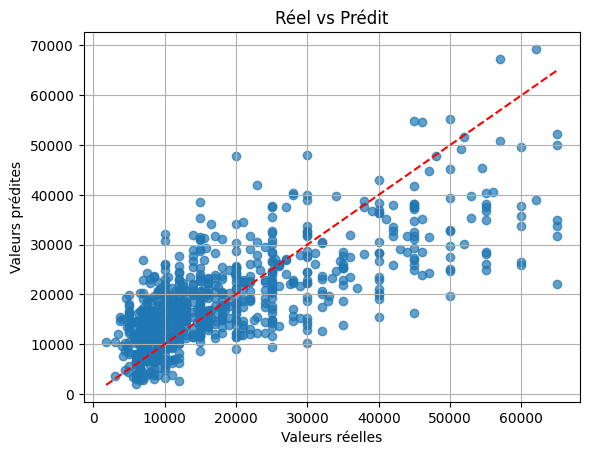

In [588]:
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Valeurs réelles")
plt.ylabel("Valeurs prédites")
plt.title("Réel vs Prédit")
plt.grid(True)
plt.show()